In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import seaborn as sns

In [2]:
train = pd.read_csv('/home/ette/Desktop/Gesture_Classification_Accelerometer/Datase_ Built/train_data.csv')
train.columns
x_train=train.drop(['label', '29','30','31','32'], axis=1)
y_train=train['label']

In [3]:
val = pd.read_csv('/home/ette/Desktop/Gesture_Classification_Accelerometer/Datase_ Built/val_data.csv')

x_val=val.drop(['label', '29','30','31','32'], axis=1)
y_val=val['label']

In [4]:
test = pd.read_csv('/home/ette/Desktop/Gesture_Classification_Accelerometer/Datase_ Built/test_data.csv')

x_test=test.drop(['label', '29','30','31','32'], axis=1)
y_test=test['label']

In [5]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout, BatchNormalization, Lambda
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, SGD

2025-05-05 23:35:16.204201: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-05 23:35:16.204695: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-05 23:35:16.206873: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-05 23:35:16.213429: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746466516.223975  107132 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746466516.22

In [7]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [8]:
model = Sequential([
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(8, activation='softmax'),
])

2025-05-05 23:35:17.160234: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
initial_learning_rate = 0.01
lr_schedule = ExponentialDecay(
    initial_learning_rate,      # Starting learning rate
    decay_steps=1000,         # How often to decay the learning rate
    decay_rate=0.96,            # The decay rate
    staircase=True              # Apply decay in discrete steps
)

# early_stopping = EarlyStopping(monitor='val_loss', patience=70, restore_best_weights=True)

In [10]:
# model.compile(optimizer=SGD(learning_rate=lr_schedule, 
#                             momentum=0.97, 
#                             nesterov=True),  # Enable Nesterov momentum
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics=['accuracy'])

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule,
                                                 beta_1=0.9, 
                                                 beta_2=0.999, 
                                                 epsilon=1e-07, 
                                                 amsgrad=False), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train,
                                epochs=800,
                                batch_size=64,
                                validation_data= (x_val, y_val),
                                verbose=2)

Epoch 1/800
41/41 - 2s - 46ms/step - accuracy: 0.3224 - loss: 1.8328 - val_accuracy: 0.3094 - val_loss: 1.8311
Epoch 2/800
41/41 - 0s - 3ms/step - accuracy: 0.4131 - loss: 1.5309 - val_accuracy: 0.3916 - val_loss: 1.5369
Epoch 3/800
41/41 - 0s - 3ms/step - accuracy: 0.4650 - loss: 1.4166 - val_accuracy: 0.4860 - val_loss: 1.3786
Epoch 4/800
41/41 - 0s - 3ms/step - accuracy: 0.4919 - loss: 1.3533 - val_accuracy: 0.4860 - val_loss: 1.3163
Epoch 5/800
41/41 - 0s - 3ms/step - accuracy: 0.4962 - loss: 1.3345 - val_accuracy: 0.5192 - val_loss: 1.2631
Epoch 6/800
41/41 - 0s - 3ms/step - accuracy: 0.5038 - loss: 1.3181 - val_accuracy: 0.5629 - val_loss: 1.1503
Epoch 7/800
41/41 - 0s - 3ms/step - accuracy: 0.5169 - loss: 1.2954 - val_accuracy: 0.5647 - val_loss: 1.1869
Epoch 8/800
41/41 - 0s - 3ms/step - accuracy: 0.5357 - loss: 1.2536 - val_accuracy: 0.5822 - val_loss: 1.1299
Epoch 9/800
41/41 - 0s - 3ms/step - accuracy: 0.5419 - loss: 1.2100 - val_accuracy: 0.5979 - val_loss: 1.0732
Epoch 10/

Epoch 134/500
41/41 - 0s - loss: 0.5559 - accuracy: 0.7992 - val_loss: 0.6959 - val_accuracy: 0.7742 - 56ms/epoch - 1ms/step
Epoch 135/500
41/41 - 0s - loss: 0.5366 - accuracy: 0.8049 - val_loss: 0.7024 - val_accuracy: 0.7679 - 56ms/epoch - 1ms/step
Epoch 136/500
41/41 - 0s - loss: 0.5477 - accuracy: 0.8037 - val_loss: 0.6772 - val_accuracy: 0.7805 - 57ms/epoch - 1ms/step
Epoch 137/500
41/41 - 0s - loss: 0.5496 - accuracy: 0.8041 - val_loss: 0.6832 - val_accuracy: 0.7773 - 57ms/epoch - 1ms/step
Epoch 138/500
41/41 - 0s - loss: 0.5621 - accuracy: 0.8003 - val_loss: 0.6610 - val_accuracy: 0.7805 - 58ms/epoch - 1ms/step
Epoch 139/500
41/41 - 0s - loss: 0.5811 - accuracy: 0.7946 - val_loss: 0.6654 - val_accuracy: 0.7815 - 57ms/epoch - 1ms/step
Epoch 140/500
41/41 - 0s - loss: 0.5613 - accuracy: 0.7930 - val_loss: 0.6983 - val_accuracy: 0.7563 - 57ms/epoch - 1ms/step
Epoch 141/500
41/41 - 0s - loss: 0.5686 - accuracy: 0.7984 - val_loss: 0.6903 - val_accuracy: 0.7710 - 56ms/epoch - 1ms/step


Epoch 200/500
41/41 - 0s - loss: 0.4503 - accuracy: 0.8363 - val_loss: 0.7092 - val_accuracy: 0.7826 - 57ms/epoch - 1ms/step
Epoch 201/500
41/41 - 0s - loss: 0.5005 - accuracy: 0.8252 - val_loss: 0.6677 - val_accuracy: 0.7889 - 57ms/epoch - 1ms/step
Epoch 202/500
41/41 - 0s - loss: 0.4648 - accuracy: 0.8366 - val_loss: 0.6570 - val_accuracy: 0.7899 - 68ms/epoch - 2ms/step
Epoch 203/500
41/41 - 0s - loss: 0.4529 - accuracy: 0.8370 - val_loss: 0.6539 - val_accuracy: 0.8088 - 56ms/epoch - 1ms/step
Epoch 204/500
41/41 - 0s - loss: 0.4552 - accuracy: 0.8328 - val_loss: 0.6561 - val_accuracy: 0.7878 - 55ms/epoch - 1ms/step
Epoch 205/500
41/41 - 0s - loss: 0.4130 - accuracy: 0.8508 - val_loss: 0.6892 - val_accuracy: 0.7931 - 58ms/epoch - 1ms/step
Epoch 206/500
41/41 - 0s - loss: 0.4969 - accuracy: 0.8263 - val_loss: 0.6653 - val_accuracy: 0.7878 - 57ms/epoch - 1ms/step
Epoch 207/500
41/41 - 0s - loss: 0.4685 - accuracy: 0.8428 - val_loss: 0.6858 - val_accuracy: 0.7941 - 58ms/epoch - 1ms/step


Epoch 266/500
41/41 - 0s - loss: 0.4007 - accuracy: 0.8581 - val_loss: 0.6897 - val_accuracy: 0.7983 - 68ms/epoch - 2ms/step
Epoch 267/500
41/41 - 0s - loss: 0.4152 - accuracy: 0.8535 - val_loss: 0.6841 - val_accuracy: 0.7920 - 64ms/epoch - 2ms/step
Epoch 268/500
41/41 - 0s - loss: 0.3893 - accuracy: 0.8630 - val_loss: 0.7066 - val_accuracy: 0.8004 - 63ms/epoch - 2ms/step
Epoch 269/500
41/41 - 0s - loss: 0.3977 - accuracy: 0.8585 - val_loss: 0.6629 - val_accuracy: 0.7941 - 66ms/epoch - 2ms/step
Epoch 270/500
41/41 - 0s - loss: 0.3980 - accuracy: 0.8646 - val_loss: 0.6844 - val_accuracy: 0.7815 - 62ms/epoch - 2ms/step
Epoch 271/500
41/41 - 0s - loss: 0.4004 - accuracy: 0.8546 - val_loss: 0.6953 - val_accuracy: 0.7994 - 59ms/epoch - 1ms/step
Epoch 272/500
41/41 - 0s - loss: 0.4012 - accuracy: 0.8585 - val_loss: 0.6809 - val_accuracy: 0.7931 - 61ms/epoch - 1ms/step
Epoch 273/500
41/41 - 0s - loss: 0.3933 - accuracy: 0.8539 - val_loss: 0.6752 - val_accuracy: 0.7941 - 59ms/epoch - 1ms/step


Epoch 332/500
41/41 - 0s - loss: 0.3506 - accuracy: 0.8772 - val_loss: 0.7088 - val_accuracy: 0.8036 - 57ms/epoch - 1ms/step
Epoch 333/500
41/41 - 0s - loss: 0.3529 - accuracy: 0.8749 - val_loss: 0.7015 - val_accuracy: 0.8025 - 57ms/epoch - 1ms/step
Epoch 334/500
41/41 - 0s - loss: 0.3323 - accuracy: 0.8841 - val_loss: 0.7108 - val_accuracy: 0.7931 - 57ms/epoch - 1ms/step
Epoch 335/500
41/41 - 0s - loss: 0.3182 - accuracy: 0.8852 - val_loss: 0.7183 - val_accuracy: 0.8099 - 57ms/epoch - 1ms/step
Epoch 336/500
41/41 - 0s - loss: 0.3509 - accuracy: 0.8791 - val_loss: 0.6959 - val_accuracy: 0.8057 - 57ms/epoch - 1ms/step
Epoch 337/500
41/41 - 0s - loss: 0.3353 - accuracy: 0.8722 - val_loss: 0.6812 - val_accuracy: 0.8141 - 57ms/epoch - 1ms/step
Epoch 338/500
41/41 - 0s - loss: 0.3473 - accuracy: 0.8764 - val_loss: 0.6972 - val_accuracy: 0.8004 - 57ms/epoch - 1ms/step
Epoch 339/500
41/41 - 0s - loss: 0.3467 - accuracy: 0.8718 - val_loss: 0.6941 - val_accuracy: 0.7994 - 57ms/epoch - 1ms/step


Epoch 398/500
41/41 - 0s - loss: 0.3243 - accuracy: 0.8864 - val_loss: 0.7209 - val_accuracy: 0.8046 - 56ms/epoch - 1ms/step
Epoch 399/500
41/41 - 0s - loss: 0.3299 - accuracy: 0.8791 - val_loss: 0.6897 - val_accuracy: 0.8025 - 57ms/epoch - 1ms/step
Epoch 400/500
41/41 - 0s - loss: 0.3111 - accuracy: 0.8925 - val_loss: 0.7006 - val_accuracy: 0.7983 - 56ms/epoch - 1ms/step
Epoch 401/500
41/41 - 0s - loss: 0.3197 - accuracy: 0.8936 - val_loss: 0.6798 - val_accuracy: 0.8099 - 56ms/epoch - 1ms/step
Epoch 402/500
41/41 - 0s - loss: 0.3009 - accuracy: 0.8898 - val_loss: 0.6957 - val_accuracy: 0.8183 - 57ms/epoch - 1ms/step
Epoch 403/500
41/41 - 0s - loss: 0.2944 - accuracy: 0.8998 - val_loss: 0.7171 - val_accuracy: 0.8036 - 56ms/epoch - 1ms/step
Epoch 404/500
41/41 - 0s - loss: 0.2982 - accuracy: 0.8883 - val_loss: 0.7082 - val_accuracy: 0.8078 - 56ms/epoch - 1ms/step
Epoch 405/500
41/41 - 0s - loss: 0.2975 - accuracy: 0.8929 - val_loss: 0.7031 - val_accuracy: 0.8130 - 56ms/epoch - 1ms/step


Epoch 464/500
41/41 - 0s - loss: 0.2925 - accuracy: 0.8967 - val_loss: 0.7096 - val_accuracy: 0.8078 - 57ms/epoch - 1ms/step
Epoch 465/500
41/41 - 0s - loss: 0.2622 - accuracy: 0.9074 - val_loss: 0.7032 - val_accuracy: 0.8162 - 56ms/epoch - 1ms/step
Epoch 466/500
41/41 - 0s - loss: 0.2729 - accuracy: 0.9013 - val_loss: 0.7130 - val_accuracy: 0.8214 - 57ms/epoch - 1ms/step
Epoch 467/500
41/41 - 0s - loss: 0.2718 - accuracy: 0.9078 - val_loss: 0.7264 - val_accuracy: 0.8078 - 56ms/epoch - 1ms/step
Epoch 468/500
41/41 - 0s - loss: 0.2753 - accuracy: 0.8990 - val_loss: 0.6955 - val_accuracy: 0.8099 - 63ms/epoch - 2ms/step
Epoch 469/500
41/41 - 0s - loss: 0.3057 - accuracy: 0.8929 - val_loss: 0.7056 - val_accuracy: 0.8088 - 57ms/epoch - 1ms/step
Epoch 470/500
41/41 - 0s - loss: 0.2846 - accuracy: 0.8936 - val_loss: 0.6992 - val_accuracy: 0.8193 - 57ms/epoch - 1ms/step
Epoch 471/500
41/41 - 0s - loss: 0.2759 - accuracy: 0.9055 - val_loss: 0.7008 - val_accuracy: 0.8057 - 57ms/epoch - 1ms/step


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         7,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153,737 (600.54 KB)

 Trainable params: 50,936 (198.97 KB)

 Non-trainable params: 928 (3.62 KB)

 Optimizer params: 101,873 (397.95 KB)

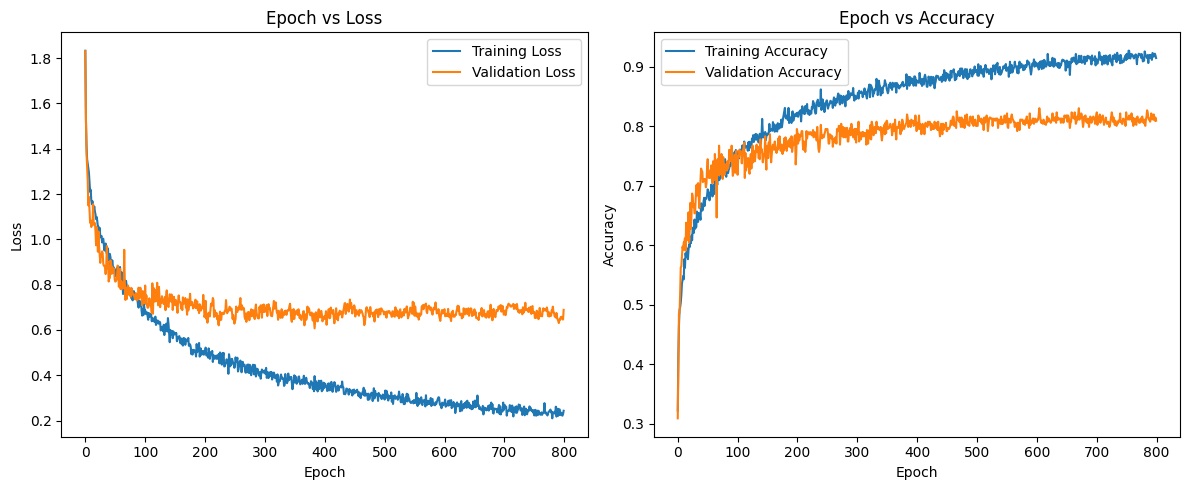

In [14]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 99.27%
Test Accuracy: 77.54%


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


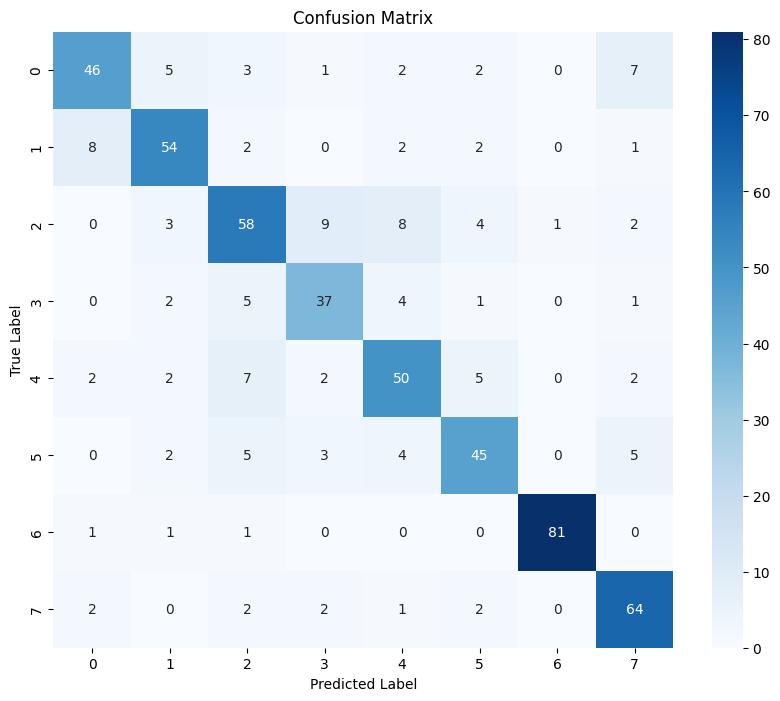

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        66
           1       0.78      0.78      0.78        69
           2       0.70      0.68      0.69        85
           3       0.69      0.74      0.71        50
           4       0.70      0.71      0.71        70
           5       0.74      0.70      0.72        64
           6       0.99      0.96      0.98        84
           7       0.78      0.88      0.83        73

    accuracy                           0.78       561
   macro avg       0.77      0.77      0.77       561
weighted avg       0.78      0.78      0.78       561



In [16]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

if len(y_test.shape) == 1 or y_test.shape[1] == 1:
    y_true = y_test  
else:
    y_true = np.argmax(y_test, axis=1)  


conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(len(np.unique(y_true)))])
print("Classification Report:")
print(class_report)


In [17]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

In [18]:
label_mapping = {
    'CW_Circle': 0,
    'CCW_Circle': 1,
    'CW_Square': 2,
    'CCW_Square': 3,
    'CW_Triangle': 4,
    'CCW_Triangle': 5,
    'Double_Tap': 6,
    'S': 7
}

Gini Coefficients:
CW_Circle: 0.91
CCW_Circle: 0.94
CW_Square: 0.89
CCW_Square: 0.94
CW_Triangle: 0.88
CCW_Triangle: 0.92
Double_Tap: 0.99
S: 0.97


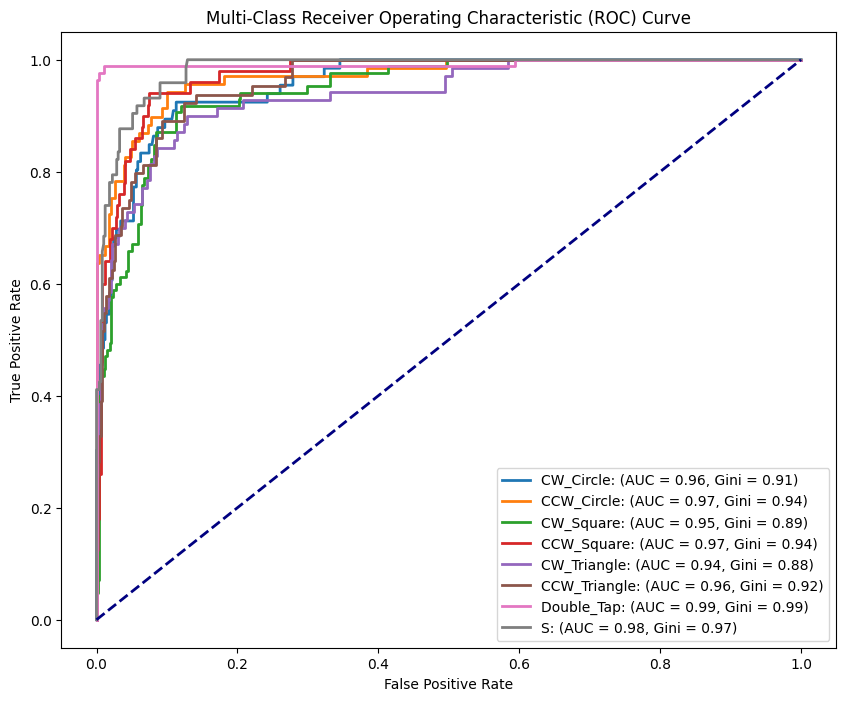

In [19]:
n_classes=8
y_test = np.array(y_test)  # Convert to numpy array if y_test is a pandas Series/DataFrame
y_pred = np.array(y_pred)  # Convert to numpy array if y_pred is a pandas Series/DataFrame

# If y_test is not one-hot encoded (1D array of class labels), convert it
if len(y_test.shape) == 1:
    y_test_one_hot = np.eye(n_classes)[y_test]  # One-hot encode y_test
else:
    y_test_one_hot = y_test  # Already one-hot encoded

# Compute ROC AUC for each class
roc_auc = []
for i in range(n_classes):
    auc = roc_auc_score(y_test_one_hot[:, i], y_pred[:, i])  # Use one-hot encoded y_test
    roc_auc.append(auc)

# Compute Gini Coefficient for each class
gini_coefficients = {i: 2 * roc_auc[i] - 1 for i in range(n_classes)}

# Print Gini Coefficients with class names
print("Gini Coefficients:")
for i, gini in gini_coefficients.items():
    class_name = [name for name, label in label_mapping.items() if label == i][0]
    print(f"{class_name}: {gini:.2f}")

# Optionally display Gini Coefficients on the ROC curve plot with class names
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    class_name = [name for name, label in label_mapping.items() if label == i][0]
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_pred[:, i])  # Get ROC curve data for each class
    plt.plot(fpr, tpr, lw=2, label=f'{class_name}: (AUC = {roc_auc[i]:.2f}, Gini = {gini_coefficients[i]:.2f})')

# Add a "chance" line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

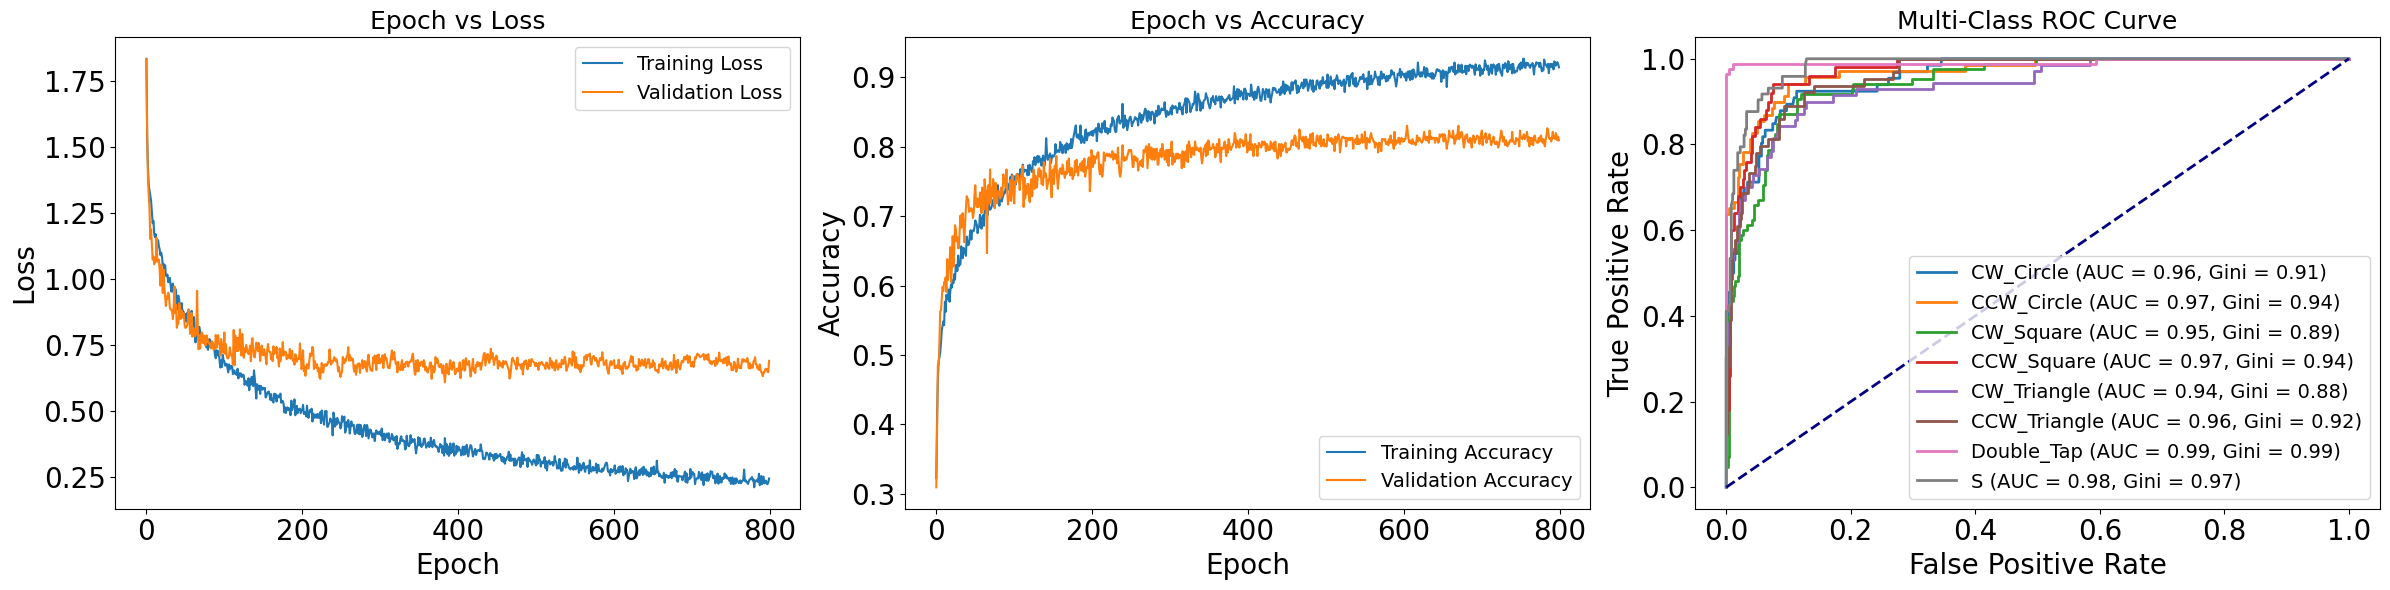

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve

# Font size settings
label_fontsize = 20
tick_fontsize = 20
title_fontsize = 18
legend_fontsize = 14

# Create the figure
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Plot Loss
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Epoch vs Loss', fontsize=title_fontsize)
axs[0].set_xlabel('Epoch', fontsize=label_fontsize)
axs[0].set_ylabel('Loss', fontsize=label_fontsize)
axs[0].legend(fontsize=legend_fontsize)
axs[0].tick_params(axis='both', labelsize=tick_fontsize)

# Plot Accuracy
axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Epoch vs Accuracy', fontsize=title_fontsize)
axs[1].set_xlabel('Epoch', fontsize=label_fontsize)
axs[1].set_ylabel('Accuracy', fontsize=label_fontsize)
axs[1].legend(fontsize=legend_fontsize)
axs[1].tick_params(axis='both', labelsize=tick_fontsize)

# Prepare ROC Curve
y_test = np.array(y_test)
y_pred = np.array(y_pred)
n_classes = 8

if len(y_test.shape) == 1:
    y_test_one_hot = np.eye(n_classes)[y_test]
else:
    y_test_one_hot = y_test

roc_auc = []
for i in range(n_classes):
    auc = roc_auc_score(y_test_one_hot[:, i], y_pred[:, i])
    roc_auc.append(auc)

gini_coefficients = {i: 2 * roc_auc[i] - 1 for i in range(n_classes)}

# Plot ROC Curves
for i in range(n_classes):
    class_name = [name for name, label in label_mapping.items() if label == i][0]
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_pred[:, i])
    axs[2].plot(fpr, tpr, lw=2, label=f'{class_name} (AUC = {roc_auc[i]:.2f}, Gini = {gini_coefficients[i]:.2f})')

axs[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[2].set_xlabel('False Positive Rate', fontsize=label_fontsize)
axs[2].set_ylabel('True Positive Rate', fontsize=label_fontsize)
axs[2].set_title('Multi-Class ROC Curve', fontsize=title_fontsize)
axs[2].legend(loc='lower right', fontsize=legend_fontsize)
axs[2].tick_params(axis='both', labelsize=tick_fontsize)

plt.savefig('three_block.png')
plt.tight_layout()
plt.show()